In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
X_train =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/xtr.mat');
X_test =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/xte.mat');
Y_train =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/ytr.mat');
Y_test =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/yte.mat');


In [4]:
X_train = [[element for element in upperElement] for upperElement in X_train['xtr']]
X_test = [[element for element in upperElement] for upperElement in X_test['xte']]

Y_train = [[element for element in upperElement] for upperElement in Y_train['ytr']]
Y_test = [[element for element in upperElement] for upperElement in Y_test['yte']]

#X_train = np.array(X_train)
#X_test = np.array(X_test)
#_train = np.array(Y_train)
#Y_test = np.array(Y_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)


In [5]:
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(55, 2)
(10, 2)
(55, 1)
(10, 1)


In [6]:
m=len(Y_train)

arr1=X_train.iloc[: , 0]
arr2=X_train.iloc[: , 1]
arr3=X_train.iloc[:, 0] ** 2
arr4=X_train.iloc[:, 1] ** 2
arr5=X_train.iloc[:,0]*X_train.iloc[:, 1]

X_train = np.column_stack((arr1 , arr2 , arr3 , arr4 , arr5))

print(X_train.shape)
#print(X_train)


m=len(Y_train)

arr1=X_test.iloc[: , 0]
arr2=X_test.iloc[: , 1]
arr3=X_test.iloc[:, 0] ** 2
arr4=X_test.iloc[:, 1] ** 2
arr5=X_test.iloc[:,0]*X_test.iloc[:, 1]

X_test = np.column_stack((arr1 , arr2 , arr3 , arr4 , arr5))

print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(55, 5)
(10, 5)
(55, 1)
(10, 1)


In [7]:

X_train=X_train[:, :]
m = X_train.shape[0] #no of examples
xmin = np.min(X_train, axis = 0)
xmax = np.max(X_train, axis = 0)
X_train = (X_train- xmin)/(xmax-xmin) #Normalization
print(X_train)

#pp = np.ones([m, 1]) # vector containg ones as all elements
#X_train = np.append(pp,X_train, axis=1) #Column of one

X_test=X_test[:, :]
m = X_test.shape[0] #no of examples
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test- xmin)/(xmax-xmin) #Normalization
#print(X_test)

#pp = np.ones([m, 1]) # vector containg ones as all elements
#X_test = np.append(pp,X_test, axis=1) #Column of one

Y_train=Y_train.iloc[:, :] #output
ymin = np.min(Y_train, axis = 0)
ymax = np.max(Y_train, axis = 0)
Y_train = (Y_train- ymin)/(ymax-ymin)

Y_test=Y_test.iloc[:, :] #output
ymin = np.min(Y_test, axis = 0)
ymax = np.max(Y_test, axis = 0)
Y_test = (Y_test- ymin)/(ymax-ymin)

[[0.51322751 0.0729927  0.49963991 0.06183738 0.06203474]
 [0.51322751 0.74452555 0.49963991 0.71316767 0.63275434]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.51322751 0.         0.49963991 0.         0.        ]
 [0.51322751 0.6350365  0.49963991 0.59682732 0.53970223]
 [0.51322751 0.02919708 0.49963991 0.02452414 0.0248139 ]
 [0.51322751 0.57664234 0.49963991 0.53639534 0.49007444]
 [0.51322751 0.64233577 0.49963991 0.60446037 0.54590571]
 [0.51322751 0.11678832 0.49963991 0.09978304 0.09925558]
 [0.51322751 0.64963504 0.49963991 0.61211099 0.55210918]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.74603175 0.80291971 0.73572685 0.77683206 0.75407148]
 [0.97883598 0.43065693 0.97770926 0.39023426 0.49338296]
 [0.25396825 0.24817518 0.24366336 0.2174146  0.14435912]
 [0.02116402 0.62773723 0.0200373  0.58921184 0.38993112]
 [0.51322751 0.81021898 0.49963991 0.78486917 0.68858561]
 [0.74603175 1.         0.73572685 1.         0.92580075]
 [0.97354497 0

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(55, 5)
(10, 5)
(55, 1)
(10, 1)


In [10]:
def cost_function(X_train,y,w): 
  hypothesis = np.dot(X_train,(w.T)) 
  #hypothesis = X_train @ w.T
  J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) 
  return J

In [11]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) 

  for i in range(iters):
    #cost_history[i] = cost_function(X,y,w)
    hypothesis = np.dot(X_train , (w.T))
    w = w - (alpha/len(y)) * (np.dot((X.T) , (hypothesis - y))).T
    cost_history[i] = cost_function(X,y,w)
  return (w,cost_history)

In [12]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * ((ind_x.T.dot(ind_x.dot(w.T) - ind_y))).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [13]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * ((ind_x.T.dot(ind_x.dot(w.T) - ind_y))).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [14]:
w= np.zeros((1 ,  (X_train.shape[1])))
print(w.shape)


(1, 5)


In [15]:
#BGD
alpha=0.5
iters=100 
lamb=0.1
batch_w,J_his = batch_gradient_descent(X_train,Y_train,w,alpha,iters,lamb)



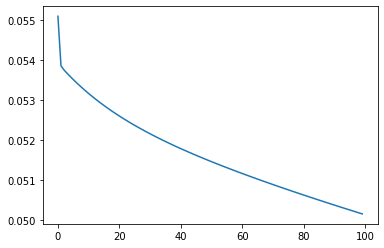

[[ 0.05869516  0.40244638  0.02873169  0.24617115 -0.15194461]]


In [16]:
plt.plot(range(iters),J_his)
plt.show()
print (batch_w)

In [17]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [18]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [19]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [20]:
#MBGD
alpha=0.05
iters=1200
batch_size=50
mini_batch_w,J_mini_batch = MB_gradient_descent(X_train,Y_train,w,alpha,iters, batch_size)

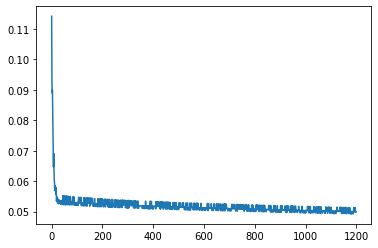

[[ 0.06210857  0.42016219  0.02589519  0.24163717 -0.17802079]]


In [21]:
plt.plot(range(iters),J_mini_batch)
plt.show()
print(mini_batch_w)

In [22]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [ ]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [ ]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
#SGD
n_epochs=3000
alpha=0.1
w_n,J_sgd = stochastic_gradient_descent(X_train,Y_train,w, alpha, n_epochs)


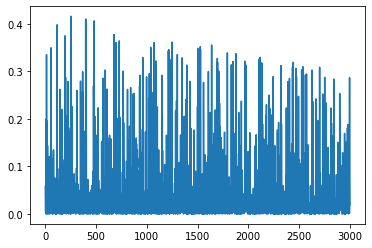

[[ 0.23817486  1.08095536  0.08270941  0.3426337  -1.18564756]]


In [ ]:
plt.plot(range(n_epochs),J_sgd)
plt.show()
print(w_n)

In [23]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [24]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [25]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
